<a href="https://colab.research.google.com/github/gillynatter/ExData_Plotting1/blob/master/Assignment1_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

###### In this Analysis, I'm given a dataset on houses and required to clean the data and present the final dataset to be used for running a machine learning model but I will not run any model. I'm required to present just the final cleaned dataset.

###### The dataset, named raw_house_data.csv, is saved in my google drive

# Importing Packages

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes = True)

# Reading Data

In [233]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/raw_house_data.csv')
data

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,NaN
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN


In [234]:
# Check the dimension of the dataset
data.shape

(5000, 16)

In [235]:
# Check the column names
list(data.columns)

['MLS',
 'sold_price',
 'zipcode',
 'longitude',
 'latitude',
 'lot_acres',
 'taxes',
 'year_built',
 'bedrooms',
 'bathrooms',
 'sqrt_ft',
 'garage',
 'kitchen_features',
 'fireplaces',
 'floor_covering',
 'HOA']

In [236]:
# Check the data types
data.dtypes

,0
MLS,int64
sold_price,float64
zipcode,int64
longitude,float64
latitude,float64
lot_acres,float64
taxes,float64
year_built,int64
bedrooms,int64
bathrooms,float64


###### The column named fireplaces is stored as an object but viewing the values shows they might actually be integers so we change them to integers later on and treat it as a numerical variable.

In [237]:
data.fireplaces.value_counts()

,count
fireplaces,
1,1806
2,1604
3,849
0,303
4,294
5,89
,25
6,18
7,9


#### count non-missing data

In [239]:
# count the number of actual data per column
data.count()

,0
MLS,5000
sold_price,5000
zipcode,5000
longitude,5000
latitude,5000
lot_acres,4990
taxes,5000
year_built,5000
bedrooms,5000
bathrooms,4994


In [240]:
# Drop duplicates
data.drop_duplicates()
data.shape

(5000, 16)

In [241]:
# Check the proportions of missing values
data.isnull().mean() * 100

,0
MLS,0.00
sold_price,0.00
zipcode,0.00
longitude,0.00
latitude,0.00
lot_acres,0.20
taxes,0.00
year_built,0.00
bedrooms,0.00
bathrooms,0.12


In [242]:
data['HOA']

,HOA
0,0
1,0
2,NaN
3,NaN
4,55
...,...
4995,NaN
4996,43
4997,NaN
4998,NaN


###### Drop missing values

In [243]:
# Drop missing values
data = data.dropna()
data

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Natural Stone, Wood, Other",422
6,21610478,2400000.0,85712,-110.883315,32.261069,2.10,19038.42,2001,9,8.0,12025.0,4.0,"Dishwasher, Garbage Disposal, Oven",6,"Carpet, Natural Stone, Wood, Other",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,21814465,534000.0,85739,-110.859829,32.546570,0.29,4184.40,2006,2,3.0,2681.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",180
4989,21902512,545000.0,85745,-111.061493,32.306472,1.19,6326.96,2007,4,3.0,3720.0,4.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,Ceramic Tile,12
4993,21908358,565000.0,85750,-110.820216,32.307646,0.83,4568.71,1986,4,3.0,2813.0,2.0,"Dishwasher, Double Sink, Electric Range, Garba...",2,"Carpet, Mexican Tile",6
4994,21909379,535000.0,85718,-110.922291,32.317496,0.18,4414.00,2002,3,2.0,2106.0,2.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,Ceramic Tile,198


In [244]:
# Recheck dimension
data.shape

(4370, 16)

In [246]:
# Proportion of data lost due to deletion of missing data
(5000 - 4370)/5000

0.126

## Seperate dataset into categorical and numberical datasets

##### I will be merging the numerical and categorical datasets on the MLS column later on as they are unique as shown below:

In [248]:
# print(len(data.zipcode.unique()))
len(data.MLS.unique())

4370

In [249]:
data['fireplaces'] = data['fireplaces'].astype(int)
data

/tmp/ipython-input-249-4224388926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fireplaces'] = data['fireplaces'].astype(int)


,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55
5,21528016,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Natural Stone, Wood, Other",422
6,21610478,2400000.0,85712,-110.883315,32.261069,2.10,19038.42,2001,9,8.0,12025.0,4.0,"Dishwasher, Garbage Disposal, Oven",6,"Carpet, Natural Stone, Wood, Other",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,21814465,534000.0,85739,-110.859829,32.546570,0.29,4184.40,2006,2,3.0,2681.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",180
4989,21902512,545000.0,85745,-111.061493,32.306472,1.19,6326.96,2007,4,3.0,3720.0,4.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,Ceramic Tile,12
4993,21908358,565000.0,85750,-110.820216,32.307646,0.83,4568.71,1986,4,3.0,2813.0,2.0,"Dishwasher, Double Sink, Electric Range, Garba...",2,"Carpet, Mexican Tile",6
4994,21909379,535000.0,85718,-110.922291,32.317496,0.18,4414.00,2002,3,2.0,2106.0,2.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,Ceramic Tile,198


In [250]:
# Numerical Dataset
num_data = data[[
 'MLS',
 'sold_price',
# 'zipcode',
# 'longitude',
# 'latitude',
 'lot_acres',
 'taxes',
 'year_built',
 'bedrooms',
 'bathrooms',
 'sqrt_ft',
 'garage',
# 'kitchen_features',
 'fireplaces',
# 'floor_covering',
# 'HOA'
 ]]

num_data

,MLS,sold_price,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces
0,21530491,5300000.0,2154.00,5272.00,1941,13,10.0,10500.0,0.0,6
1,21529082,4200000.0,1707.00,10422.36,1997,2,2.0,7300.0,0.0,5
4,21306357,3411450.0,3.21,15393.00,1995,4,6.0,6396.0,3.0,5
5,21528016,3250000.0,1.67,27802.84,1999,3,4.0,6842.0,3.0,5
6,21610478,2400000.0,2.10,19038.42,2001,9,8.0,12025.0,4.0,6
...,...,...,...,...,...,...,...,...,...,...
4988,21814465,534000.0,0.29,4184.40,2006,2,3.0,2681.0,3.0,1
4989,21902512,545000.0,1.19,6326.96,2007,4,3.0,3720.0,4.0,1
4993,21908358,565000.0,0.83,4568.71,1986,4,3.0,2813.0,2.0,2
4994,21909379,535000.0,0.18,4414.00,2002,3,2.0,2106.0,2.0,1


In [251]:
#  Categorical Dataset
cat_data = data[[
 'MLS',
 'zipcode',
 'kitchen_features',
 #'fireplaces',
 'floor_covering',
 'HOA']]

cat_data

,MLS,zipcode,kitchen_features,floor_covering,HOA
0,21530491,85637,"Dishwasher, Freezer, Refrigerator, Oven","Mexican Tile, Wood",0
1,21529082,85646,"Dishwasher, Garbage Disposal","Natural Stone, Other",0
4,21306357,85750,"Dishwasher, Garbage Disposal, Refrigerator, Mi...","Carpet, Concrete",55
5,21528016,85718,"Dishwasher, Garbage Disposal, Refrigerator, Mi...","Natural Stone, Wood, Other",422
6,21610478,85712,"Dishwasher, Garbage Disposal, Oven","Carpet, Natural Stone, Wood, Other",0
...,...,...,...,...,...
4988,21814465,85739,"Dishwasher, Double Sink, Electric Range, Garba...","Carpet, Ceramic Tile",180
4989,21902512,85745,"Dishwasher, Double Sink, Garbage Disposal, Gas...",Ceramic Tile,12
4993,21908358,85750,"Dishwasher, Double Sink, Electric Range, Garba...","Carpet, Mexican Tile",6
4994,21909379,85718,"Dishwasher, Double Sink, Electric Range, Garba...",Ceramic Tile,198


## Analysis of Numerical Data

###### I take for granted that the variable I want to predict is the sold_price column

In [252]:
num_data

,MLS,sold_price,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces
0,21530491,5300000.0,2154.00,5272.00,1941,13,10.0,10500.0,0.0,6
1,21529082,4200000.0,1707.00,10422.36,1997,2,2.0,7300.0,0.0,5
4,21306357,3411450.0,3.21,15393.00,1995,4,6.0,6396.0,3.0,5
5,21528016,3250000.0,1.67,27802.84,1999,3,4.0,6842.0,3.0,5
6,21610478,2400000.0,2.10,19038.42,2001,9,8.0,12025.0,4.0,6
...,...,...,...,...,...,...,...,...,...,...
4988,21814465,534000.0,0.29,4184.40,2006,2,3.0,2681.0,3.0,1
4989,21902512,545000.0,1.19,6326.96,2007,4,3.0,3720.0,4.0,1
4993,21908358,565000.0,0.83,4568.71,1986,4,3.0,2813.0,2.0,2
4994,21909379,535000.0,0.18,4414.00,2002,3,2.0,2106.0,2.0,1


###### I display a pairs plot of the numerical variables below. This will help me get a pictorial view of the variables that are related to the sold_price. I will also use a heatmap to see the correlations among these variables.

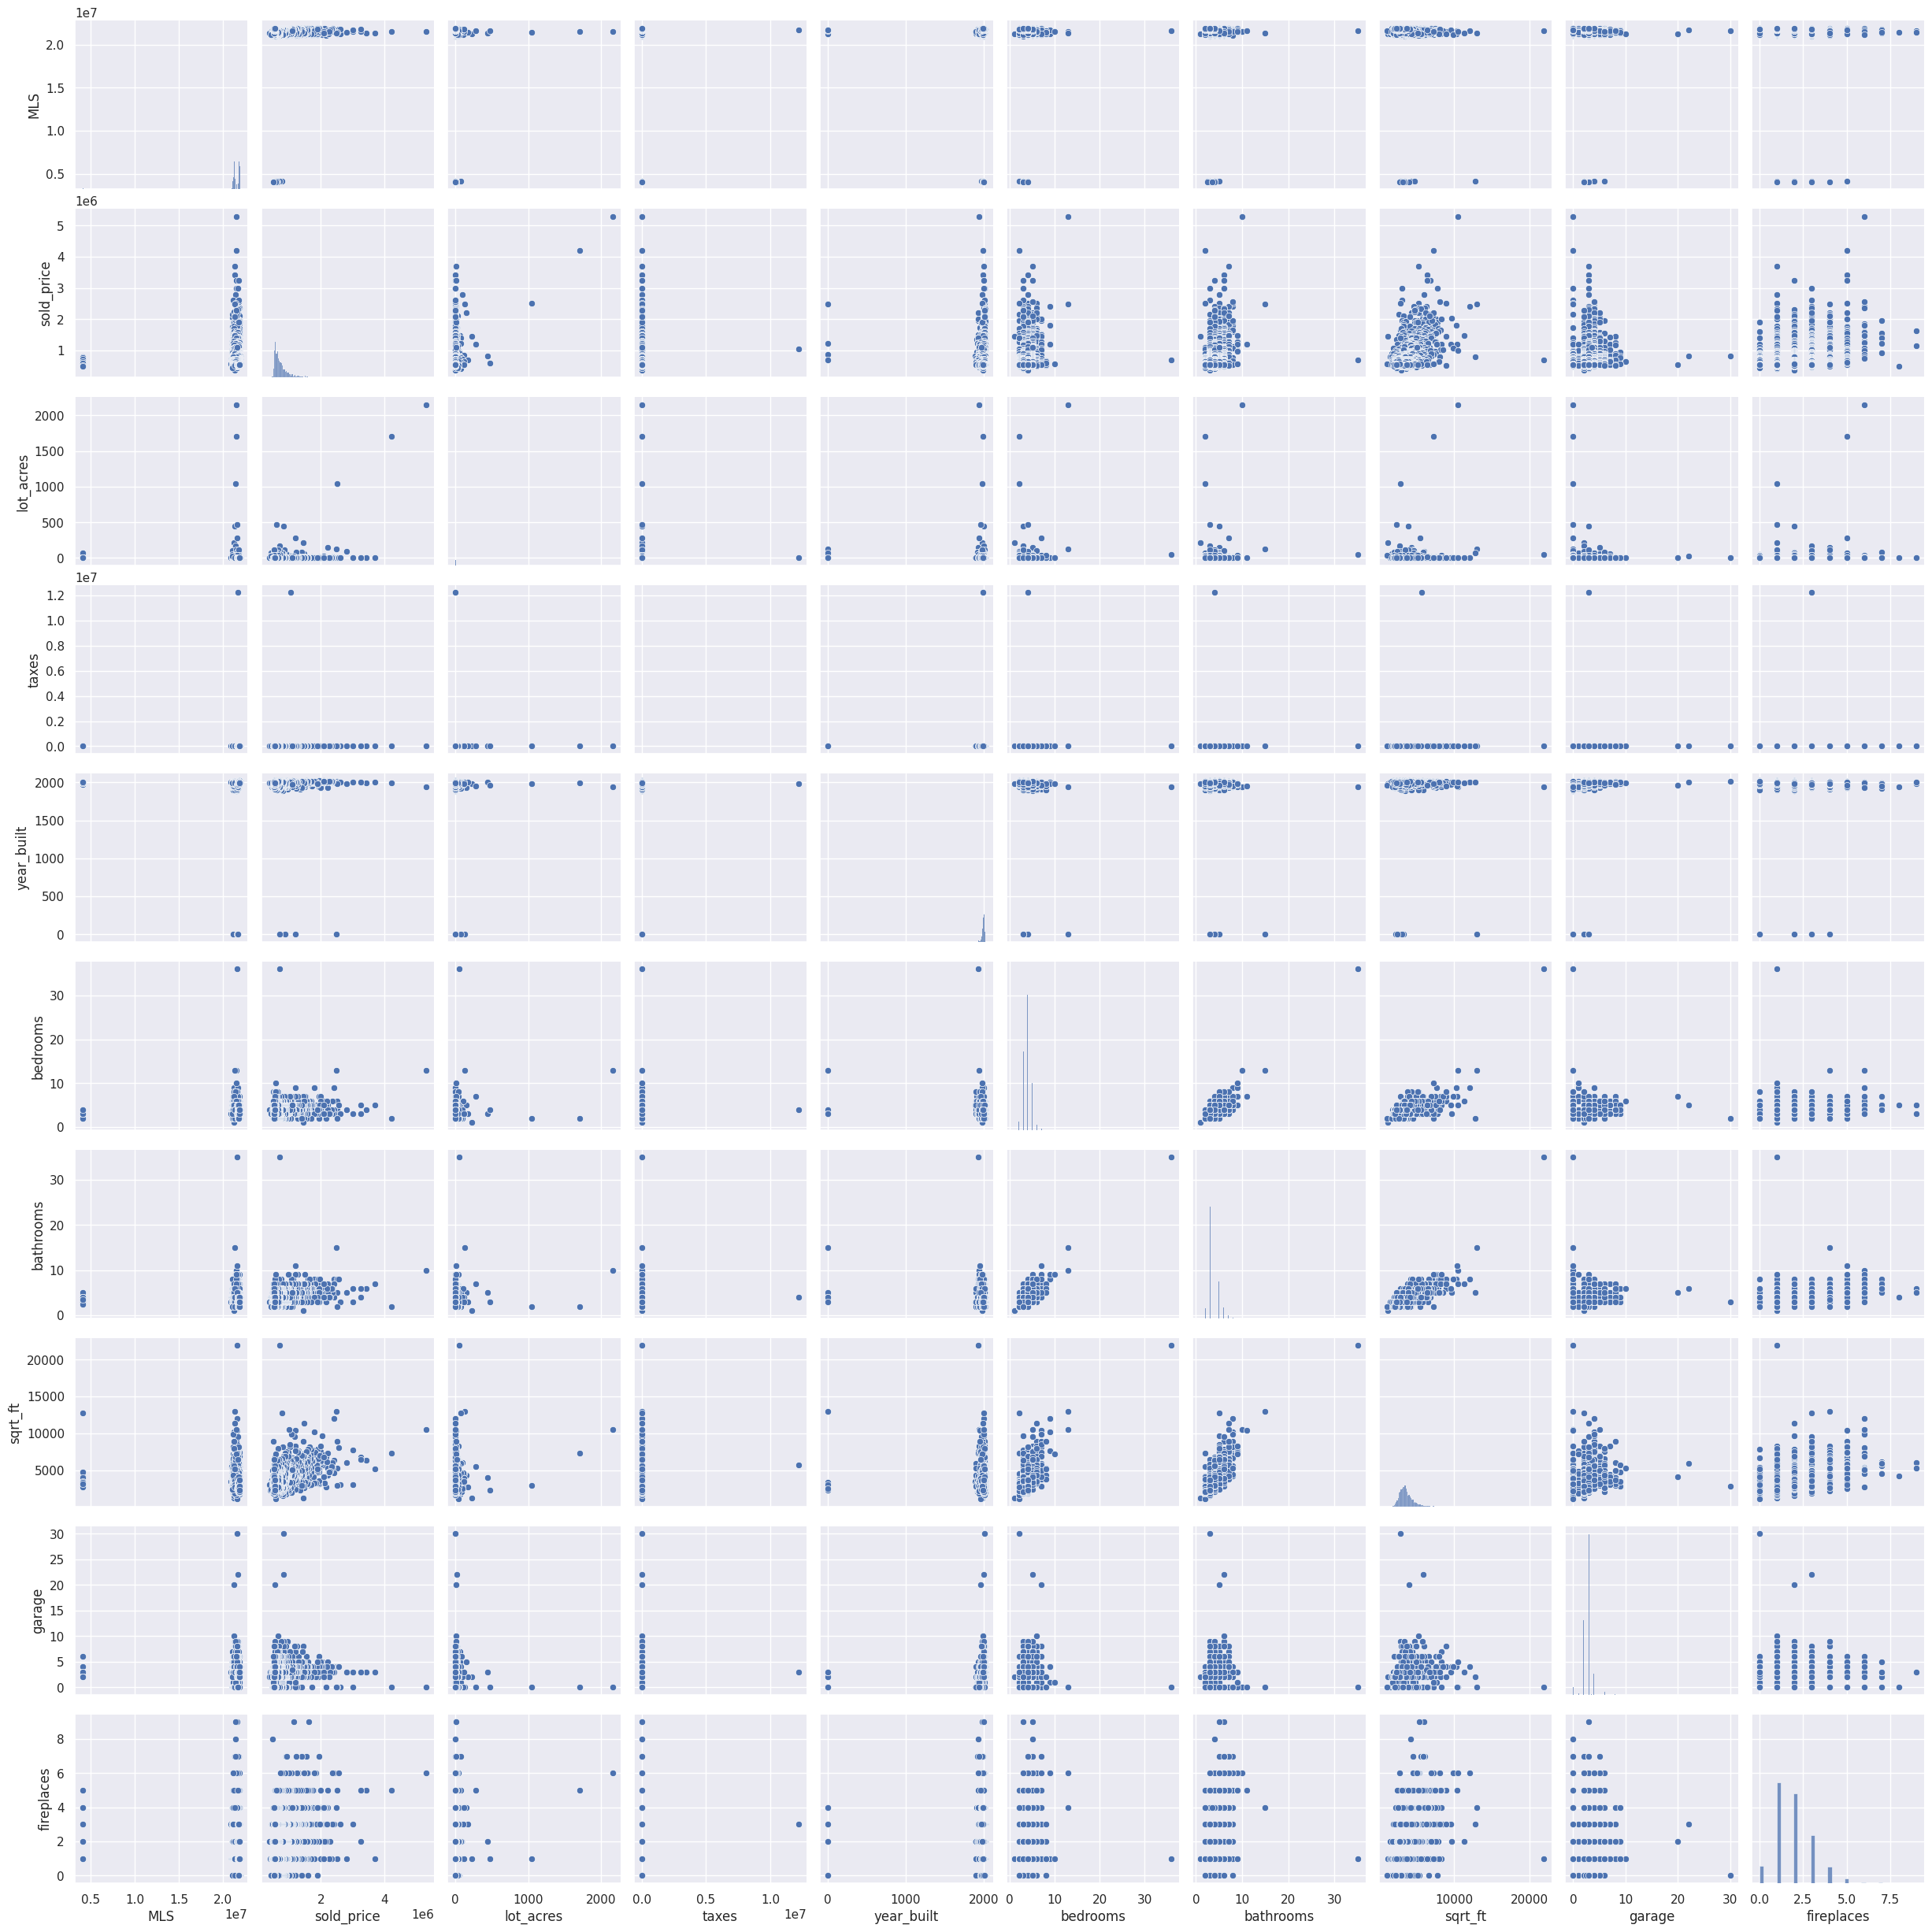

In [253]:
sns.pairplot(num_data)

#### Heat map

<Axes: >

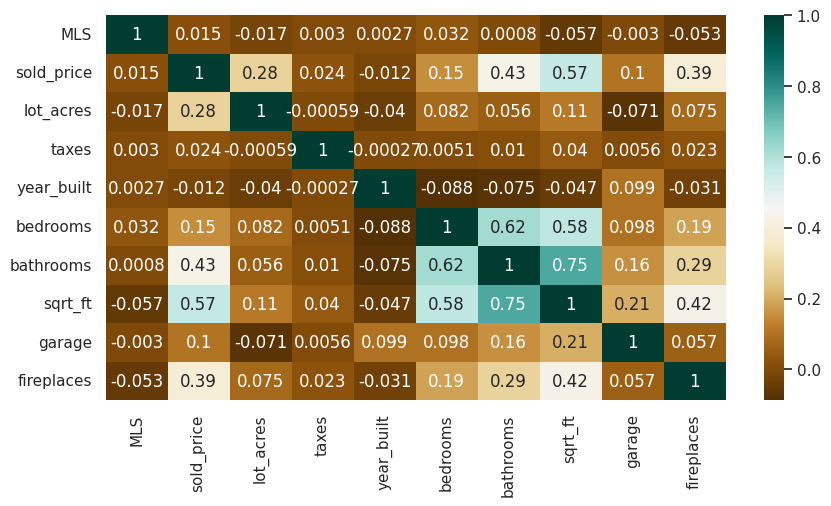

In [254]:
plt.figure(figsize=(10,5))
c = num_data.corr()
sns.heatmap(c, cmap="BrBG", annot =True)

###### The heatmap shows that the top four variables that are correlated with the sold_price are sqrt_ft (0.57), bathrooms (0.43), firplaces (0.39) and lot_acres (0.28).
###### Also, sqrt_ft is highly correlated with bathrooms (0.75) so I drop one of them. In judging which one to drop, I see that sqrt_ft is more correlated with the sold_price (0.57) than bathrooms (0.43) so I drop bathrooms. Note that, depending on the use case (whther model interpretability is more important than predictive accuracy) I consider which variable that when I have in the model will be easy to explain to business stakeholders. In ths case both variables can be easily understood.
###### bedrooms and bathrooms are also highly correlated (0.62) but I will be droping bathrooms as mentioned above so no problem here.

In [255]:
# Drop bathrooms
num_data = num_data.drop('bathrooms', axis = 1)
num_data

,MLS,sold_price,lot_acres,taxes,year_built,bedrooms,sqrt_ft,garage,fireplaces
0,21530491,5300000.0,2154.00,5272.00,1941,13,10500.0,0.0,6
1,21529082,4200000.0,1707.00,10422.36,1997,2,7300.0,0.0,5
4,21306357,3411450.0,3.21,15393.00,1995,4,6396.0,3.0,5
5,21528016,3250000.0,1.67,27802.84,1999,3,6842.0,3.0,5
6,21610478,2400000.0,2.10,19038.42,2001,9,12025.0,4.0,6
...,...,...,...,...,...,...,...,...,...
4988,21814465,534000.0,0.29,4184.40,2006,2,2681.0,3.0,1
4989,21902512,545000.0,1.19,6326.96,2007,4,3720.0,4.0,1
4993,21908358,565000.0,0.83,4568.71,1986,4,2813.0,2.0,2
4994,21909379,535000.0,0.18,4414.00,2002,3,2106.0,2.0,1


#### Box Plots

######  I look at boxplots below and replace outliers with the minimum and maximum non-outlier data.

<Axes: ylabel='sold_price'>

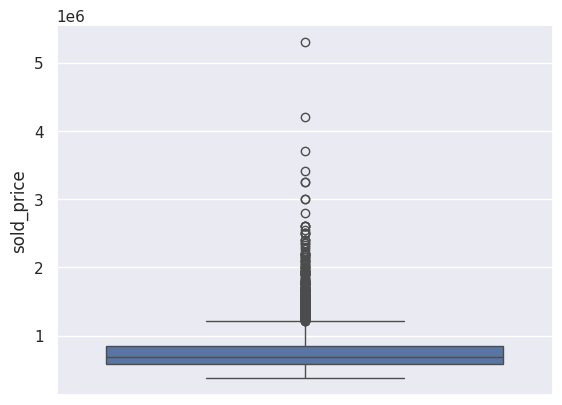

In [256]:
sns.boxplot(num_data['sold_price'])

<Axes: ylabel='lot_acres'>

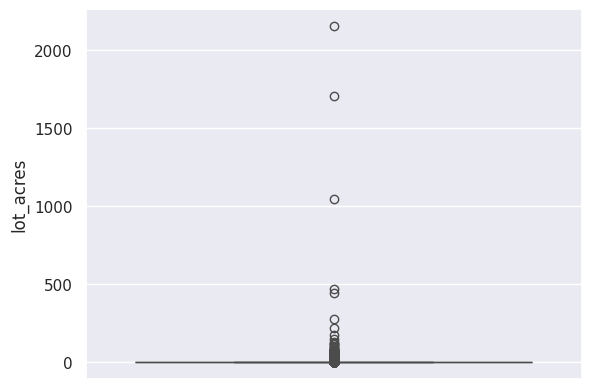

In [257]:
sns.boxplot(num_data['lot_acres'])

<Axes: ylabel='taxes'>

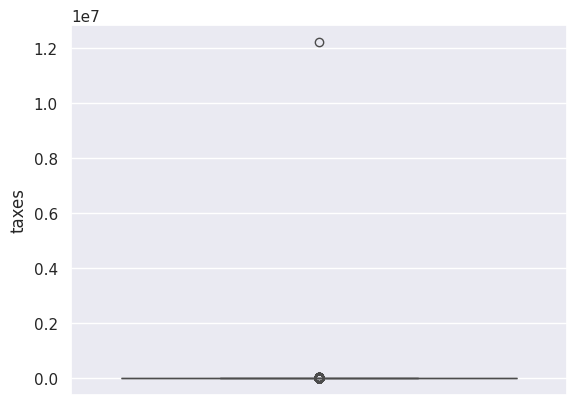

In [258]:
sns.boxplot(num_data['taxes'])

<Axes: ylabel='sqrt_ft'>

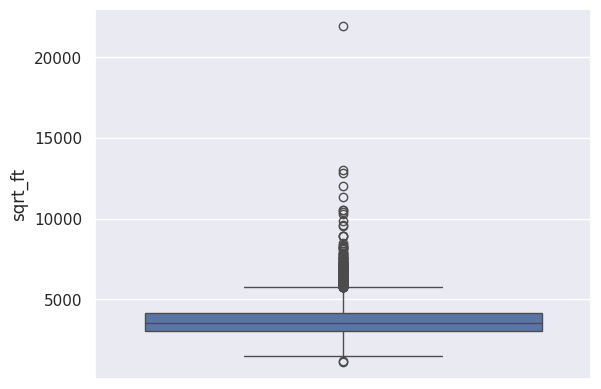

In [259]:
sns.boxplot(num_data['sqrt_ft'])

<Axes: ylabel='bedrooms'>

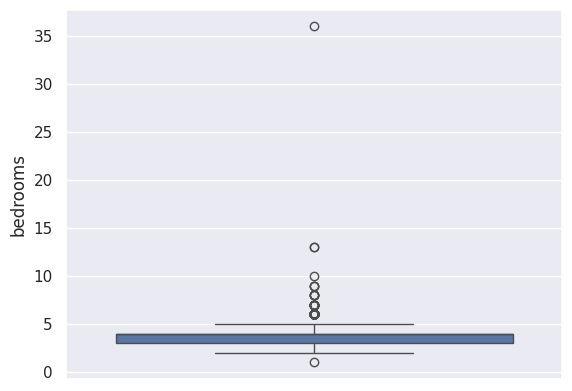

In [260]:
sns.boxplot(num_data['bedrooms'])

<Axes: ylabel='garage'>

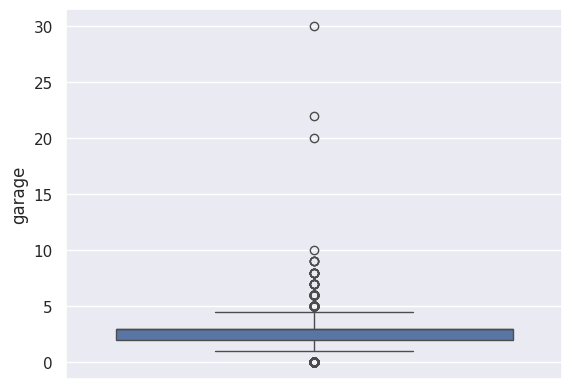

In [261]:
sns.boxplot(num_data['garage'])

<Axes: ylabel='fireplaces'>

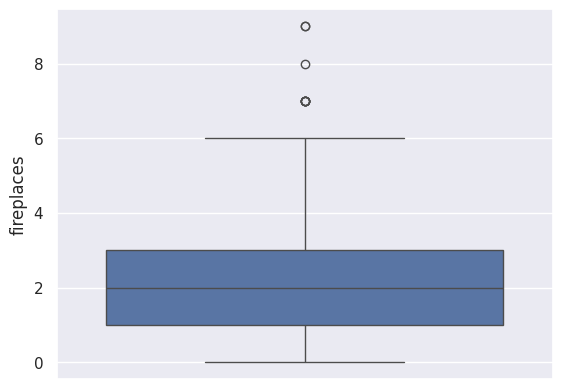

In [262]:
sns.boxplot(num_data['fireplaces'])

###### I wish to replace the outliers displayed in the boxplots above with the minimum and the maximum data points that are not outlies as opposed to deleting them. This way I will not lose more data points.

In [263]:
# Function to replace the outliers with minimum and maximum data that are not outliers
def replace_outliers(df, column):
  # Calculate Q1, Q3 and IQR
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  # Define bounds
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Get min and max within bounds
  non_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)][column]
  valid_min = non_outliers.min()
  valid_max = non_outliers.max()

  # Replace Outliers
  df[column] = np.where(df[column] < lower_bound, valid_min, df[column])
  df[column] = np.where(df[column] > upper_bound, valid_max, df[column])

  return df


###### Replace Outliers

In [265]:
vars = [
 'sold_price',
 'lot_acres',
 'taxes',
 'bedrooms',
 'sqrt_ft',
 'fireplaces',
 'garage']

In [266]:
for i in vars:
  num_data = replace_outliers(num_data, i)

num_data

,MLS,sold_price,lot_acres,taxes,year_built,bedrooms,sqrt_ft,garage,fireplaces
0,21530491,1215000.0,2.98,5272.00,1941,5,5729.0,1.0,6
1,21529082,1215000.0,2.98,10422.36,1997,2,5729.0,1.0,5
4,21306357,1215000.0,2.98,13098.11,1995,4,5729.0,3.0,5
5,21528016,1215000.0,1.67,13098.11,1999,3,5729.0,3.0,5
6,21610478,1215000.0,2.10,13098.11,2001,5,5729.0,4.0,6
...,...,...,...,...,...,...,...,...,...
4988,21814465,534000.0,0.29,4184.40,2006,2,2681.0,3.0,1
4989,21902512,545000.0,1.19,6326.96,2007,4,3720.0,4.0,1
4993,21908358,565000.0,0.83,4568.71,1986,4,2813.0,2.0,2
4994,21909379,535000.0,0.18,4414.00,2002,3,2106.0,2.0,1


###### I display the box plots again to check if the function worked as expected

<Axes: ylabel='sold_price'>

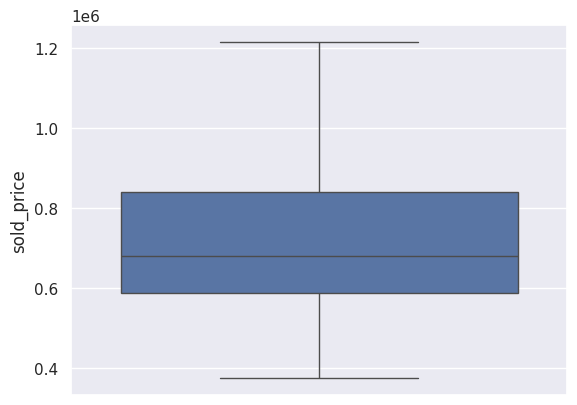

In [267]:
sns.boxplot(num_data['sold_price'])

<Axes: ylabel='taxes'>

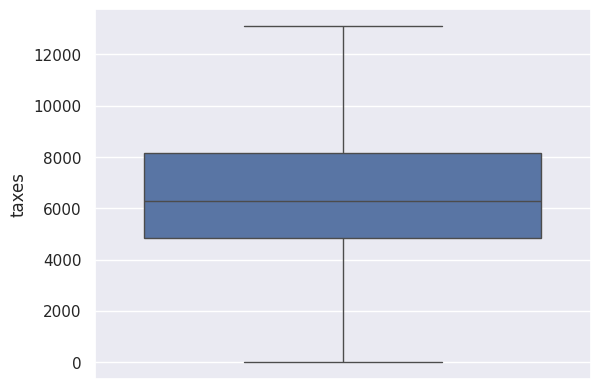

In [268]:
sns.boxplot(num_data['taxes'])

<Axes: ylabel='bedrooms'>

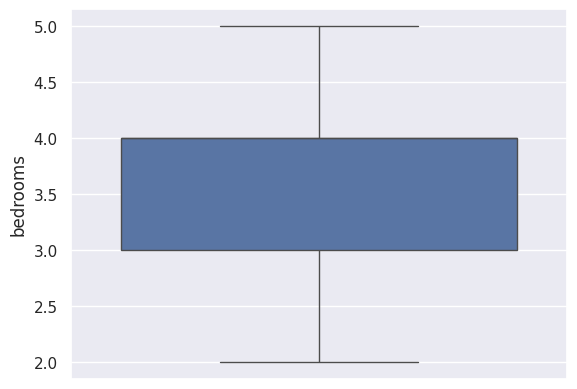

In [269]:
sns.boxplot(num_data['bedrooms'])

<Axes: ylabel='garage'>

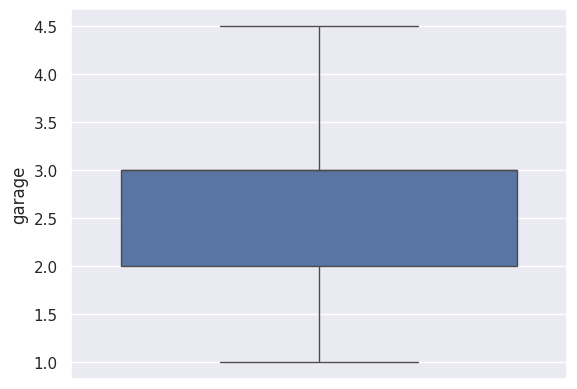

In [270]:
sns.boxplot(num_data['garage'])

<Axes: ylabel='lot_acres'>

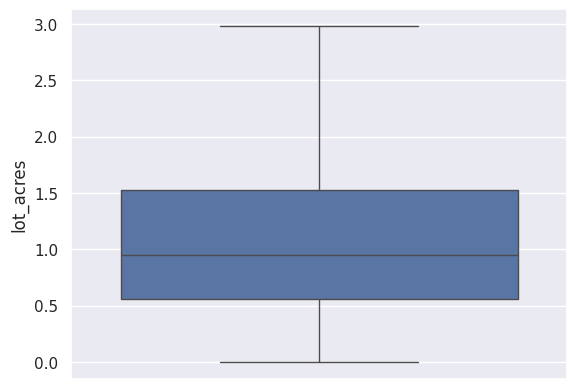

In [271]:
sns.boxplot(num_data['lot_acres'])

<Axes: ylabel='sqrt_ft'>

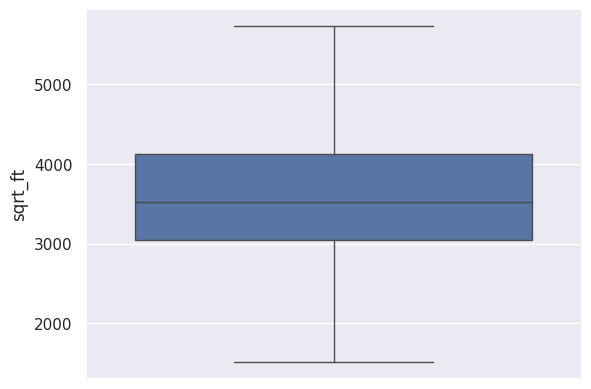

In [273]:
sns.boxplot(num_data['sqrt_ft'])

<Axes: ylabel='fireplaces'>

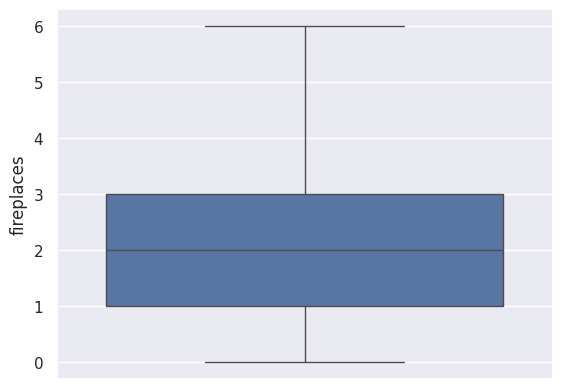

In [274]:
sns.boxplot(num_data['fireplaces'])

###### As expected the values have been replaced correctly

## Analysis of Categorical data

In [275]:
cat_data

,MLS,zipcode,kitchen_features,floor_covering,HOA
0,21530491,85637,"Dishwasher, Freezer, Refrigerator, Oven","Mexican Tile, Wood",0
1,21529082,85646,"Dishwasher, Garbage Disposal","Natural Stone, Other",0
4,21306357,85750,"Dishwasher, Garbage Disposal, Refrigerator, Mi...","Carpet, Concrete",55
5,21528016,85718,"Dishwasher, Garbage Disposal, Refrigerator, Mi...","Natural Stone, Wood, Other",422
6,21610478,85712,"Dishwasher, Garbage Disposal, Oven","Carpet, Natural Stone, Wood, Other",0
...,...,...,...,...,...
4988,21814465,85739,"Dishwasher, Double Sink, Electric Range, Garba...","Carpet, Ceramic Tile",180
4989,21902512,85745,"Dishwasher, Double Sink, Garbage Disposal, Gas...",Ceramic Tile,12
4993,21908358,85750,"Dishwasher, Double Sink, Electric Range, Garba...","Carpet, Mexican Tile",6
4994,21909379,85718,"Dishwasher, Double Sink, Electric Range, Garba...",Ceramic Tile,198


###### My objective for the Categorical variables is to get all the potential values for the floor_coverings and create indicator variables for each floor_covering type. I can do the same for the kitchen_features column but I omit that from this analysis.

In [276]:
# Collect the values of the floor_coverings column into a list
floor_coverings = list(data['floor_covering'])
floor_coverings

['Mexican Tile, Wood',
 'Natural Stone, Other',
 'Carpet, Concrete',
 'Natural Stone, Wood, Other',
 'Carpet, Natural Stone, Wood, Other',
 'Carpet, Natural Stone, Wood',
 'Carpet, Natural Stone, Wood, Other',
 'Carpet, Concrete',
 'Carpet, Natural Stone, Wood',
 'Mexican Tile, Natural Stone, Wood',
 'Natural Stone',
 'Natural Stone, Wood',
 'Natural Stone, Wood',
 'Carpet, Natural Stone',
 'Carpet, Natural Stone',
 'Natural Stone, Wood',
 'Carpet, Concrete, Natural Stone, Wood',
 'Natural Stone, Wood',
 'Carpet, Natural Stone, Wood, Other',
 'Carpet, Natural Stone, Wood',
 'Carpet, Concrete, Mexican Tile',
 'Carpet, Ceramic Tile, Natural Stone',
 'Carpet, Concrete, Natural Stone, Wood',
 'Natural Stone, Wood',
 'Concrete',
 'Carpet, Natural Stone',
 'Carpet, Mexican Tile, Other',
 'Natural Stone',
 'Carpet, Other: Porcelain',
 'Carpet, Natural Stone',
 'Carpet, Other',
 'Carpet, Other',
 'Carpet, Ceramic Tile, Mexican Tile',
 'Concrete, Natural Stone, Wood',
 'Carpet, Natural Stone',


In [277]:
# Get the different floor coverings
unique_floor_coverings = [] # define an empty list
for value in floor_coverings: # for each list of string
  temp = value.split(',') # collect the different floor coverings for that observation into a list
  for val in temp: # for each floor covering in the list
    if val.strip() not in unique_floor_coverings: # check if it is NOT already in the unique_floor_coverings list
      unique_floor_coverings.append(val.strip()) # append it if it is not in the unique_floor_coverings list
print(len(unique_floor_coverings))
print()
unique_floor_coverings

81



['Mexican Tile',
 'Wood',
 'Natural Stone',
 'Other',
 'Carpet',
 'Concrete',
 'Ceramic Tile',
 'Other: Porcelain',
 'Vinyl',
 'Other: Brick Pavers',
 'Other: Flagstone',
 'Other: Marble-Master Bath',
 'Other: Marble',
 'Granite',
 'Laminate',
 'Other: Quartzite',
 'Other: Porcelyn',
 'Other: Tile',
 'Other: Porcelain Tile',
 'Other: Porcelain tile',
 'Other: Brick Floor',
 'Other: Brick',
 'Other: Travertine Tile',
 'Indoor/Outdoor',
 'Other: Travertine',
 'Other: Lime Stone',
 'Other: Porcelain/Engineered',
 'Other: Brick inlayed',
 'Other: Organic Wool Carpet',
 'Other: brick',
 'Other: Egytian sandstone',
 'Other: Travertine & slate',
 'Other: Cork',
 'Other: TBD',
 'Other: porcelain tile',
 'Other: porclain tile',
 'Other: 100% Porcelain Tile',
 'Other: San Marcos Mex Tile',
 'Other: carpet- guest house',
 'Other: Recycled Porcelain',
 'Other: travertine',
 'Other: Mesquite wood floors',
 'Other: Slate',
 'Other: Concrete tile',
 'Other: Throughout home',
 'Other: Italian tile',
 

###### Group all the floor coverings that has 'Other' in its name into one group called 'Other'

In [279]:
unique_floorings = ['Mexican Tile',
 'Wood',
 'Natural Stone',
 'Other',
 'Carpet',
 'Concrete',
 'Ceramic Tile',
 'Vinyl',
 'Granite',
 'Laminate',
 'Indoor/Outdoor'
]
unique_floorings

['Mexican Tile',
 'Wood',
 'Natural Stone',
 'Other',
 'Carpet',
 'Concrete',
 'Ceramic Tile',
 'Vinyl',
 'Granite',
 'Laminate',
 'Indoor/Outdoor']

#### Create Indicator Variables

In [280]:
for i in unique_floorings:
  cat_data['has_' + str(i)] = cat_data['floor_covering'].apply(lambda x: 1 if i in x else 0)

cat_data

/tmp/ipython-input-280-172109805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['has_' + str(i)] = cat_data['floor_covering'].apply(lambda x: 1 if i in x else 0)
/tmp/ipython-input-280-172109805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['has_' + str(i)] = cat_data['floor_covering'].apply(lambda x: 1 if i in x else 0)
/tmp/ipython-input-280-172109805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,MLS,zipcode,kitchen_features,floor_covering,HOA,has_Mexican Tile,has_Wood,has_Natural Stone,has_Other,has_Carpet,has_Concrete,has_Ceramic Tile,has_Vinyl,has_Granite,has_Laminate,has_Indoor/Outdoor
0,21530491,85637,"Dishwasher, Freezer, Refrigerator, Oven","Mexican Tile, Wood",0,1,1,0,0,0,0,0,0,0,0,0
1,21529082,85646,"Dishwasher, Garbage Disposal","Natural Stone, Other",0,0,0,1,1,0,0,0,0,0,0,0
4,21306357,85750,"Dishwasher, Garbage Disposal, Refrigerator, Mi...","Carpet, Concrete",55,0,0,0,0,1,1,0,0,0,0,0
5,21528016,85718,"Dishwasher, Garbage Disposal, Refrigerator, Mi...","Natural Stone, Wood, Other",422,0,1,1,1,0,0,0,0,0,0,0
6,21610478,85712,"Dishwasher, Garbage Disposal, Oven","Carpet, Natural Stone, Wood, Other",0,0,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,21814465,85739,"Dishwasher, Double Sink, Electric Range, Garba...","Carpet, Ceramic Tile",180,0,0,0,0,1,0,1,0,0,0,0
4989,21902512,85745,"Dishwasher, Double Sink, Garbage Disposal, Gas...",Ceramic Tile,12,0,0,0,0,0,0,1,0,0,0,0
4993,21908358,85750,"Dishwasher, Double Sink, Electric Range, Garba...","Carpet, Mexican Tile",6,1,0,0,0,1,0,0,0,0,0,0
4994,21909379,85718,"Dishwasher, Double Sink, Electric Range, Garba...",Ceramic Tile,198,0,0,0,0,0,0,1,0,0,0,0


###### I can repeat the same process to create indicator variables for the kitchen_features column but I omit that from this analysis.
###### Having created the indicator variables, I drop the original columns.

In [282]:
cat_data = cat_data.drop(['zipcode',	'kitchen_features',	'floor_covering',	'HOA'], axis = 1)
cat_data

,MLS,has_Mexican Tile,has_Wood,has_Natural Stone,has_Other,has_Carpet,has_Concrete,has_Ceramic Tile,has_Vinyl,has_Granite,has_Laminate,has_Indoor/Outdoor
0,21530491,1,1,0,0,0,0,0,0,0,0,0
1,21529082,0,0,1,1,0,0,0,0,0,0,0
4,21306357,0,0,0,0,1,1,0,0,0,0,0
5,21528016,0,1,1,1,0,0,0,0,0,0,0
6,21610478,0,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4988,21814465,0,0,0,0,1,0,1,0,0,0,0
4989,21902512,0,0,0,0,0,0,1,0,0,0,0
4993,21908358,1,0,0,0,1,0,0,0,0,0,0
4994,21909379,0,0,0,0,0,0,1,0,0,0,0


#### Merge the numerical and categorical datasets

In [286]:
f_data = pd.merge(num_data, cat_data, how = 'inner', on = 'MLS')
f_data

,MLS,sold_price,lot_acres,taxes,year_built,bedrooms,sqrt_ft,garage,fireplaces,has_Mexican Tile,has_Wood,has_Natural Stone,has_Other,has_Carpet,has_Concrete,has_Ceramic Tile,has_Vinyl,has_Granite,has_Laminate,has_Indoor/Outdoor
0,21530491,1215000.0,2.98,5272.00,1941,5,5729.0,1.0,6,1,1,0,0,0,0,0,0,0,0,0
1,21529082,1215000.0,2.98,10422.36,1997,2,5729.0,1.0,5,0,0,1,1,0,0,0,0,0,0,0
2,21306357,1215000.0,2.98,13098.11,1995,4,5729.0,3.0,5,0,0,0,0,1,1,0,0,0,0,0
3,21528016,1215000.0,1.67,13098.11,1999,3,5729.0,3.0,5,0,1,1,1,0,0,0,0,0,0,0
4,21610478,1215000.0,2.10,13098.11,2001,5,5729.0,4.0,6,0,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4365,21814465,534000.0,0.29,4184.40,2006,2,2681.0,3.0,1,0,0,0,0,1,0,1,0,0,0,0
4366,21902512,545000.0,1.19,6326.96,2007,4,3720.0,4.0,1,0,0,0,0,0,0,1,0,0,0,0
4367,21908358,565000.0,0.83,4568.71,1986,4,2813.0,2.0,2,1,0,0,0,1,0,0,0,0,0,0
4368,21909379,535000.0,0.18,4414.00,2002,3,2106.0,2.0,1,0,0,0,0,0,0,1,0,0,0,0


###### write to csv file

In [287]:
f_data.to_csv('/content/drive/MyDrive/Colab Notebooks/data_for_model.csv', index=False)